# Expansión Estratégica de Biogenesys con Python #

### Avance 1: Carga y transformacion de los datos ###

In [37]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [38]:
#Cargar Dataset
df=pd.read_csv("../Data/data_latinoamerica.csv", sep=",")

In [39]:
#Imprimir Dataset
df.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


In [40]:
#Verificar que se cargo completo
print("Tamaño Dataset", df.shape)

Tamaño Dataset (12216057, 50)


In [41]:
#Filtrar por Location_Key por paises.
paises_interes= ["AR","BR","PE","CO","CL","MX"]
df_paises= df[df["location_key"].isin(paises_interes)]
print("Tamaño Dataset filtrado", df_paises.shape)

Tamaño Dataset filtrado (5946, 50)


In [42]:
#Filtrar por date
df_paises_date=df_paises[df_paises["date"]>"2021-01-01"]
print("Tamaño Dataset filtrado", df_paises_date.shape)

Tamaño Dataset filtrado (3744, 50)


In [43]:
#Guardamos el archivo ya filtrado
df_paises_date.to_csv("DatosFiltrados.csv", index=False, encoding="utf-8")

In [44]:
#Levantamos el nuevo archivo
df_filtrado=pd.read_csv("../Data/DatosFiltrados.csv", sep=",")

In [45]:
#Control
df_filtrado.shape

(3744, 50)

In [46]:
#Generamos una copia para no modificar el filtrado original

df_filtrado_copy=df_filtrado.copy()

In [47]:
#Estado del data set
valores_nulos=df_filtrado_copy.isnull().sum()[df_filtrado_copy.isnull().sum()>0]
print(valores_nulos)

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


In [48]:
#Remplazar NaN con bucle for
for pais in paises_interes:
    df_filtrado_copy["new_confirmed"]=df_filtrado_copy["new_confirmed"].fillna(df_filtrado_copy[df_filtrado_copy["location_key"]==pais]["new_confirmed"].mean())
    df_filtrado_copy["new_deceased"]=df_filtrado_copy["new_deceased"].fillna(df_filtrado_copy[df_filtrado_copy["location_key"]==pais]["new_deceased"].mean())
    df_filtrado_copy["average_temperature_celsius"]=df_filtrado_copy["average_temperature_celsius"].fillna(df_filtrado_copy[df_filtrado_copy["location_key"]==pais]["average_temperature_celsius"].mean())
    df_filtrado_copy["minimum_temperature_celsius"]=df_filtrado_copy["minimum_temperature_celsius"].fillna(df_filtrado_copy[df_filtrado_copy["location_key"]==pais]["minimum_temperature_celsius"].mean())
    df_filtrado_copy["maximum_temperature_celsius"]=df_filtrado_copy["maximum_temperature_celsius"].fillna(df_filtrado_copy[df_filtrado_copy["location_key"]==pais]["maximum_temperature_celsius"].mean())
    df_filtrado_copy["rainfall_mm"]=df_filtrado_copy["rainfall_mm"].fillna(df_filtrado_copy[df_filtrado_copy["location_key"]==pais]["rainfall_mm"].mean())
    df_filtrado_copy["relative_humidity"]=df_filtrado_copy["relative_humidity"].fillna(df_filtrado_copy[df_filtrado_copy["location_key"]==pais]["relative_humidity"].mean())
    df_filtrado_copy["cumulative_vaccine_doses_administered"]=df_filtrado_copy["cumulative_vaccine_doses_administered"].fillna(0)
    df_filtrado_copy["new_recovered"]=df_filtrado_copy["new_recovered"].fillna(0)
    df_filtrado_copy["cumulative_recovered"]=df_filtrado_copy["cumulative_recovered"].fillna(0)

In [49]:
#Actualizacion del estado del data set
valores_nulos2=df_filtrado_copy.isnull().sum()[df_filtrado_copy.isnull().sum()>0]
print(valores_nulos2)

cumulative_confirmed    21
cumulative_deceased     21
dtype: int64


In [50]:
# Rellenar columna "cumulative_confirmed"-
def rellenar_cumulative_confirmed(group):
    group = group.sort_index()  
    group['cumulative_confirmed'] = group['new_confirmed'].cumsum()
    return group

# Aplicar la función a cada grupo de 'location_key'
df_filtrado_copy = df_filtrado_copy.groupby('location_key').apply(rellenar_cumulative_confirmed)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9924\1542087173.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado_copy = df_filtrado_copy.groupby('location_key').apply(rellenar_cumulative_confirmed)


In [51]:
# Rellenar columna "cumulative_deceased"
def rellenar_cumulative_deceased(group):
    group = group.sort_index()
    group['cumulative_deceased'] = group['new_deceased'].cumsum()
    return group

# Restablecer el índice
df_filtrado_copy = df_filtrado_copy.reset_index(drop=True)

# Aplicar la función a cada grupo de 'location_key'
df_filtrado_copy = df_filtrado_copy.groupby('location_key').apply(rellenar_cumulative_deceased)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9924\1462340067.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado_copy = df_filtrado_copy.groupby('location_key').apply(rellenar_cumulative_deceased)


In [52]:
#Actualizacion del estado del data set
valores_nulos3=df_filtrado_copy.isnull().sum()[df_filtrado_copy.isnull().sum()>0]
print(valores_nulos3)

Series([], dtype: int64)


#### Se agregan nuevas columnas que pueden ser necesarias para un futuro.

In [53]:
# Convertimos la columna date a formato fecha 
# La duplicamos para que al pasarla como indice, no deje de aparecer en nuestro dataset
# Asignamos de la misma como indice para que las nuevas columnas esten en orden:
df_filtrado_copy['date']=pd.to_datetime(df_filtrado_copy['date'])
df_filtrado_copy['date_backup'] = df_filtrado_copy['date']
df_filtrado_copy.set_index('date_backup', inplace=True)


In [54]:
# Crear la nueva columna 'intermediate'
# Copia de la columna cumulative pero desplzando un lugar y poniendo un 0 arriba.
df_filtrado_copy['intermediate'] = [0] + df_filtrado_copy['cumulative_vaccine_doses_administered'][:-1].tolist()

In [55]:
# Crear la nueva columna 'new_vaccine_doses_administered'
df_filtrado_copy['new_vaccine_doses_administered'] = df_filtrado_copy['cumulative_vaccine_doses_administered'] - df_filtrado_copy['intermediate']

In [56]:
# Reemplazar negativos por cero
df_filtrado_copy['new_vaccine_doses_administered'] = df_filtrado_copy['new_vaccine_doses_administered'].apply(lambda x: max(x, 0))


In [57]:
# Crear la nueva columna 'active_cases'
df_filtrado_copy['active_cases'] = (df_filtrado_copy['new_confirmed'] - df_filtrado_copy['new_deceased']) - df_filtrado_copy['new_recovered']

In [58]:
# Remplazar negativoss por cero
df_filtrado_copy["active_cases"] = df_filtrado_copy["active_cases"].apply(lambda x: max(x,0))

In [59]:
# Control de la correcta creacion
df_filtrado_copy

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered,intermediate,new_vaccine_doses_administered,active_cases
date_backup,,,,,,,,,,,,,,,,,,,,,
2021-01-02,AR,2021-01-02,AR,Argentina,7767.000000,166.000000,7.767000e+03,166.000000,20334.0,44938712.0,...,76.520,147.086,79.483,26.6,15.8,0.0,0.0,0.0,20334.0,7601.000000
2021-01-03,AR,2021-01-03,AR,Argentina,4934.000000,157.000000,1.270100e+04,323.000000,20529.0,44938712.0,...,76.520,147.086,79.483,26.6,15.8,0.0,0.0,20334.0,195.0,4777.000000
2021-01-04,AR,2021-01-04,AR,Argentina,13953.000000,157.000000,2.665400e+04,480.000000,25164.0,44938712.0,...,76.520,147.086,79.483,26.6,15.8,0.0,0.0,20529.0,4635.0,13796.000000
2021-01-05,AR,2021-01-05,AR,Argentina,14085.000000,160.000000,4.073900e+04,640.000000,29852.0,44938712.0,...,76.520,147.086,79.483,26.6,15.8,0.0,0.0,25164.0,4688.0,13925.000000
2021-01-06,AR,2021-01-06,AR,Argentina,14496.000000,131.000000,5.523500e+04,771.000000,34162.0,44938712.0,...,76.520,147.086,79.483,26.6,15.8,0.0,0.0,29852.0,4310.0,14365.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-13,PE,2022-09-13,PE,Peru,1150.000000,22.000000,3.119954e+06,122285.000000,0.0,29381884.0,...,76.516,146.370,84.815,63.9,12.6,0.0,0.0,83624934.0,0.0,1128.000000
2022-09-14,PE,2022-09-14,PE,Peru,12911.385484,134.379032,3.132865e+06,122419.379032,0.0,29381884.0,...,76.516,146.370,84.815,63.9,12.6,0.0,0.0,0.0,0.0,12777.006452
2022-09-15,PE,2022-09-15,PE,Peru,12911.385484,134.379032,3.145777e+06,122553.758065,0.0,29381884.0,...,76.516,146.370,84.815,63.9,12.6,0.0,0.0,0.0,0.0,12777.006452


In [60]:
#Guardamos el archivo completo
df_filtrado_copy.to_csv("DatosFinalesFiltrado.csv", index=False, encoding="utf-8")

In [61]:
#Importamos el archivo nuevo
df_completo=pd.read_csv("../Data/DatosFinalesFiltrado.csv", sep=",")

In [32]:
#Calculo de estadistica descriptiva
estadisticas = {}
for columna in df_completo.columns:
    if df_completo[columna].dtype in ['int64', 'float64']:
        estadisticas[columna] = {
            'Media': df_completo[columna].mean(),
            'Mediana': df_completo[columna].median(),
            'Desviación Estándar': df_completo[columna].std(),
            'Mínimo': df_completo[columna].min(),
            'Máximo': df_completo[columna].max()
        }

In [ ]:
#Print de estadica
for col, stats in estadisticas.items():
    print(f"\nEstadísticas para {col}:")
    for key, value in stats.items():
        print(f"{key}: {value}")


Estadísticas para new_confirmed:
Media: 13930.531008322996
Mediana: 5227.0
Desviación Estándar: 24205.55004224952
Mínimo: -573.0
Máximo: 298408.0

Estadísticas para new_deceased:
Media: 276.3632370933278
Mediana: 101.0
Desviación Estándar: 507.13319302633454
Mínimo: 0.0
Máximo: 11447.0

Estadísticas para cumulative_confirmed:
Media: 4695585.173047198
Mediana: 2880439.0
Desviación Estándar: 5853467.7339276895
Mínimo: 1695.0
Máximo: 26894077.770967744

Estadísticas para cumulative_deceased:
Media: 123369.44192643712
Mediana: 90051.0
Desviación Estándar: 126383.5242861957
Mínimo: 64.0
Máximo: 490060.7580645161

Estadísticas para cumulative_vaccine_doses_administered:
Media: 65444735.39636752
Mediana: 32445756.5
Desviación Estándar: 92476798.57715064
Mínimo: 0.0
Máximo: 347868481.0

Estadísticas para population:
Media: 77721474.16666667
Mediana: 47910798.0
Desviación Estándar: 67137757.18338968
Mínimo: 17574003.0
Máximo: 212559409.0

Estadísticas para population_male:
Media: 37870352.5
Me

In [ ]:
#Calcular media, varianza y rango
def calcular_estadisticas(columna):
    if columna in df_completo.columns and df_completo[columna].dtype in ['int64', 'float64']:
        mediana = df_completo[columna].median()
        varianza = df_completo[columna].var()
        rango = df_completo[columna].max() - df_completo[columna].min()
        return {'Mediana': mediana, 'Varianza': varianza, 'Rango': rango}
    else:
        return "Columna no válida o no numérica"

In [ ]:
#Formula para recopilas las medidas calculadas en un diccionario
estadisticas_varianza = {}
for columna in df_completo.columns:
    if df_completo[columna].dtype in ['int64', 'float64']:
        estadisticas_varianza[columna] = calcular_estadisticas(columna)

In [ ]:
#Mostrar todos los resultados
for col, stats in estadisticas_varianza.items():
    print(f"\n-Estadísticas para {col}: {stats}")


-Estadísticas para new_confirmed: {'Mediana': np.float64(5227.0), 'Varianza': np.float64(585908652.8478458), 'Rango': np.float64(298981.0)}

-Estadísticas para new_deceased: {'Mediana': np.float64(101.0), 'Varianza': np.float64(257184.0754690855), 'Rango': np.float64(11447.0)}

-Estadísticas para cumulative_confirmed: {'Mediana': np.float64(2880439.0), 'Varianza': np.float64(34263084512132.562), 'Rango': np.float64(26892382.770967744)}

-Estadísticas para cumulative_deceased: {'Mediana': np.float64(90051.0), 'Varianza': np.float64(15972795210.999418), 'Rango': np.float64(489996.7580645161)}

-Estadísticas para cumulative_vaccine_doses_administered: {'Mediana': np.float64(32445756.5), 'Varianza': np.float64(8551958275078892.0), 'Rango': np.float64(347868481.0)}

-Estadísticas para population: {'Mediana': np.float64(47910798.0), 'Varianza': np.float64(4507478439615793.0), 'Rango': np.float64(194985406.0)}

-Estadísticas para population_male: {'Mediana': np.float64(22254165.0), 'Varianza

## AVANCE 2 ##

In [ ]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#Importar archivo

df_completo=pd.read_csv("../Data/DatosFinalesFiltrado.csv", sep=",")

#### ANALISIS ESTADISTICO CON NUMPY Y PANDAS ####

In [ ]:
# Media
media=df_completo.groupby("country_name").mean(numeric_only=True).round(2)
media

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
country_name,,,,,,,,,,,,,,,,,,,,,
Argentina,12911.39,134.38,4435091.47,59352.03,3.455602e+07,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,...,15057273.0,2690269.0,55032.0,76.52,147.09,79.48,26.6,15.8,0.00,0.00
Brazil,43099.48,785.35,14878105.74,351058.47,2.124233e+08,212559409.0,104435783.0,108123626.0,27807886.0,183241641.0,...,21846507.0,8241430.0,134981.0,75.67,188.53,91.42,29.9,16.6,43203.79,21078833.57
Chile,6152.85,71.63,1598783.37,23283.13,3.494980e+07,17574003.0,8972014.0,8601989.0,2341903.0,16610135.0,...,6723516.0,709418.0,12027.0,80.04,107.67,59.04,25.3,12.4,0.00,0.00
Colombia,7442.70,184.77,3064006.23,83013.83,1.996348e+07,50882884.0,24984564.0,25898320.0,9512141.0,40827302.0,...,10779376.0,1090598.0,36132.0,77.11,151.62,78.00,37.0,15.8,6377.88,2287552.72
Mexico,8894.08,285.21,2628150.30,128422.85,5.272062e+07,110991953.0,54855231.0,57481307.0,24948670.0,102626859.0,...,21671908.0,1831423.0,102418.0,74.99,184.38,95.82,36.7,15.7,0.00,0.00
Peru,5082.69,196.83,1569373.93,95086.34,3.805518e+07,29381884.0,14450757.0,14931127.0,7120114.0,25390339.0,...,10554712.0,1256339.0,16425.0,76.52,146.37,84.82,63.9,12.6,0.00,0.00


In [ ]:
# Mediana
median=df_completo.groupby("country_name").median(numeric_only=True).round(2)
median

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
country_name,,,,,,,,,,,,,,,,,,,,,
Argentina,5223.5,64.0,3659536.0,70222.5,27074120.5,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,...,15057273.0,2690269.0,55032.0,76.52,147.09,79.48,26.6,15.8,0.0,0.0
Brazil,32382.0,389.0,14202583.5,414485.0,272342377.5,212559409.0,104435783.0,108123626.0,27807886.0,183241641.0,...,21846507.0,8241430.0,134981.0,75.67,188.53,91.42,29.9,16.6,33510.0,21066006.0
Chile,4249.5,33.0,1104456.5,21229.0,38086370.5,17574003.0,8972014.0,8601989.0,2341903.0,16610135.0,...,6723516.0,709418.0,12027.0,80.04,107.67,59.04,25.3,12.4,0.0,0.0
Colombia,2585.0,93.5,3318861.0,97726.0,534729.0,50882884.0,24984564.0,25898320.0,9512141.0,40827302.0,...,10779376.0,1090598.0,36132.0,77.11,151.62,78.00,37.0,15.8,1980.0,2147173.5
Mexico,4255.0,142.5,2358146.0,147082.5,11549150.5,110991953.0,54855231.0,57481307.0,24948670.0,102626859.0,...,21671908.0,1831423.0,102418.0,74.99,184.38,95.82,36.7,15.7,0.0,0.0
Peru,2249.5,51.0,1192632.0,106653.0,36415446.5,29381884.0,14450757.0,14931127.0,7120114.0,25390339.0,...,10554712.0,1256339.0,16425.0,76.52,146.37,84.82,63.9,12.6,0.0,0.0


In [ ]:
# Varianza
varianza=df_completo.groupby("country_name").var(numeric_only=True).round(2)
varianza

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
country_name,,,,,,,,,,,,,,,,,,,,,
Argentina,5.533830e+08,27559.08,7.472102e+12,7.609917e+08,1.333309e+15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
Brazil,1.566620e+09,756022.05,6.105554e+13,2.183687e+10,1.692489e+16,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.608202e+09,6.246903e+13
Chile,4.643274e+07,210605.84,1.321634e+12,1.862988e+08,3.830539e+14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
Colombia,8.524151e+07,40820.84,2.089657e+12,1.304051e+09,7.735639e+14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.367884e+07,4.187090e+12
Mexico,1.443122e+08,109168.91,2.803318e+12,2.244688e+09,4.499511e+15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
Peru,6.436550e+07,64514.92,8.511926e+11,1.110415e+09,9.561880e+14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00


#### VISUALIZACION DE DATOS CON MATPLOTLIB Y SEABORN ####

In [ ]:
#Configurar Seaborn y matplotlib

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (8, 4)

In [ ]:
#Pasar la columna "date" de string a datetime,convertirla en indice y crear una nueva columna que muestre solo mes-año
df_completo['date']=pd.to_datetime(df_completo['date'])
df_completo["mes"] = df_completo["date"].dt.to_period("M")  # Extraer mes para análisis temporal
df_completo.set_index('date', inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9924\2754539548.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped,x='country_name',y='new_confirmed',palette="viridis")


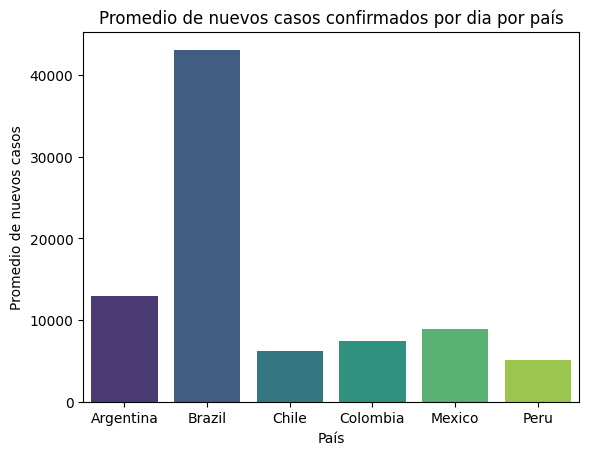

In [33]:
#Gráficos para comparar diferentes paises por el promedio de new_confirmed

# Seleccion de columnas numéricas
columnas_numericas = df_completo.select_dtypes(include=['float64', 'int64']).columns

# Agrupado por país y calculo de la media para las columnas numéricas
df_grouped = df_completo.groupby('country_name')[columnas_numericas].mean()

# Visualización:
sns.barplot(data=df_grouped,x='country_name',y='new_confirmed',palette="viridis")
plt.title("Promedio de nuevos casos confirmados por dia por país")
plt.xlabel("País")
plt.ylabel("Promedio de nuevos casos")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5012\781200058.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped,x='country_name',y='new_confirmed',palette="viridis")


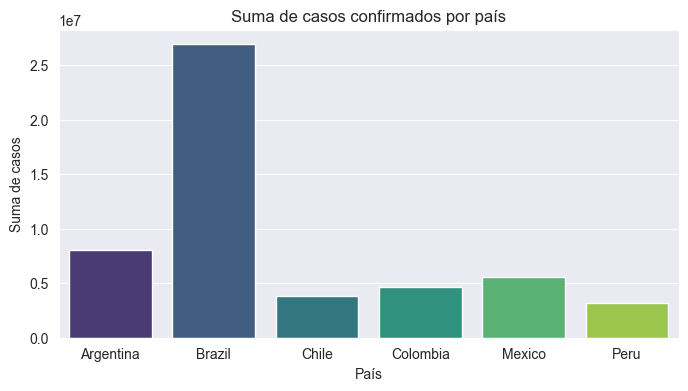

In [ ]:
#Gráficos para comparar diferentes paises por la sum de new_confirmed

# Seleccion de columnas numéricas
columnas_numericas = df_completo.select_dtypes(include=['float64', 'int64']).columns

# Agrupado por país y calculo de la media para las columnas numéricas
df_grouped = df_completo.groupby('country_name')[columnas_numericas].sum()

# Visualización:
sns.barplot(data=df_grouped,x='country_name',y='new_confirmed',palette="viridis")
plt.title("Suma de casos confirmados por país")
plt.xlabel("País")
plt.ylabel("Suma de casos")
plt.show()

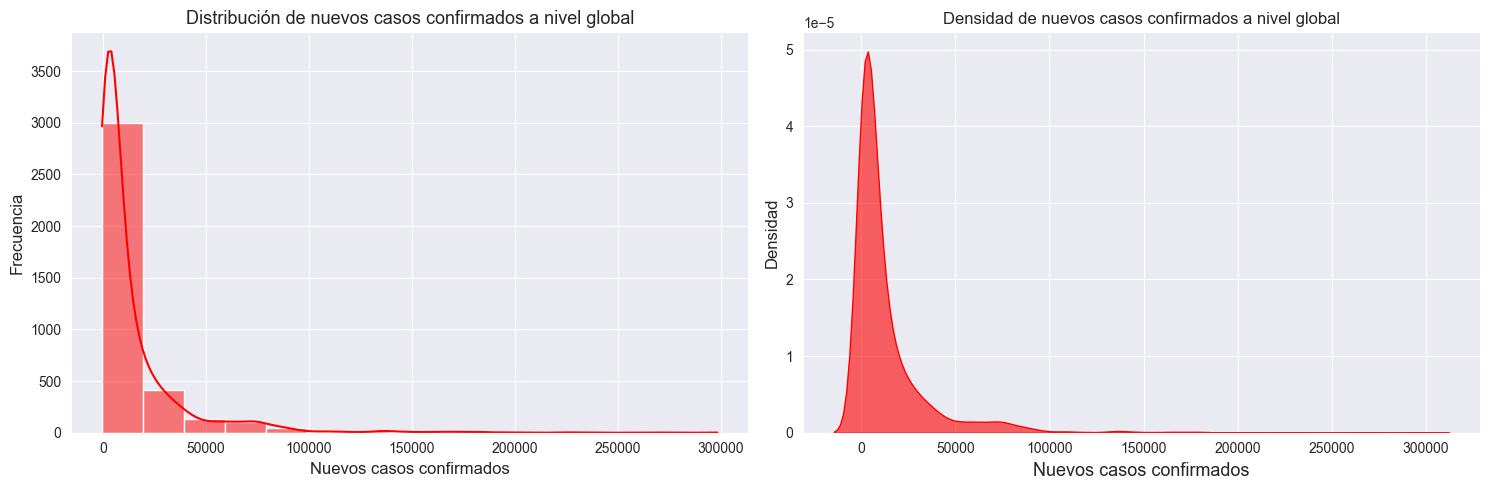

In [ ]:
# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Primer gráfico: Histograma
sns.histplot(df_completo['new_confirmed'], bins=15, kde=True, color="red", ax=axes[0])
axes[0].set_title("Distribución de nuevos casos confirmados a nivel global",fontsize=13)
axes[0].set_xlabel("Nuevos casos confirmados",fontsize=12)
axes[0].set_ylabel("Frecuencia",fontsize=12)

# Segundo gráfico: Gráfico de densidad
sns.kdeplot(df_completo['new_confirmed'], fill=True, color="red", alpha=0.6, ax=axes[1])
axes[1].set_title("Densidad de nuevos casos confirmados a nivel global",fontsize=12)
axes[1].set_xlabel("Nuevos casos confirmados",fontsize=13)
axes[1].set_ylabel("Densidad",fontsize=12)

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()


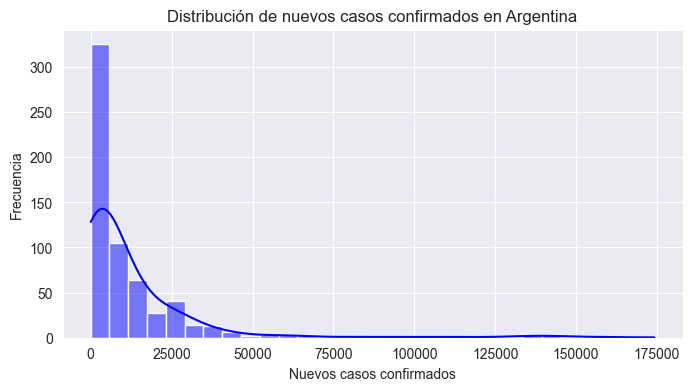

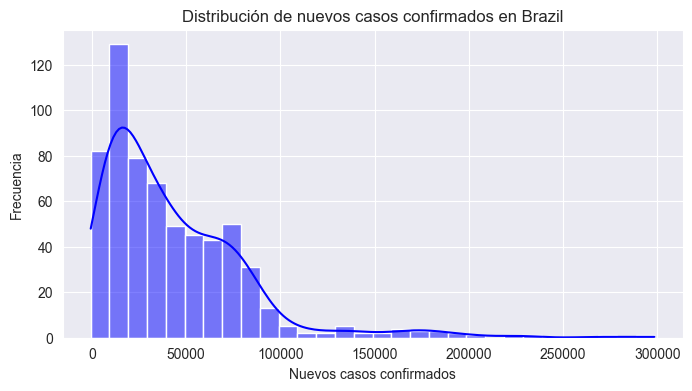

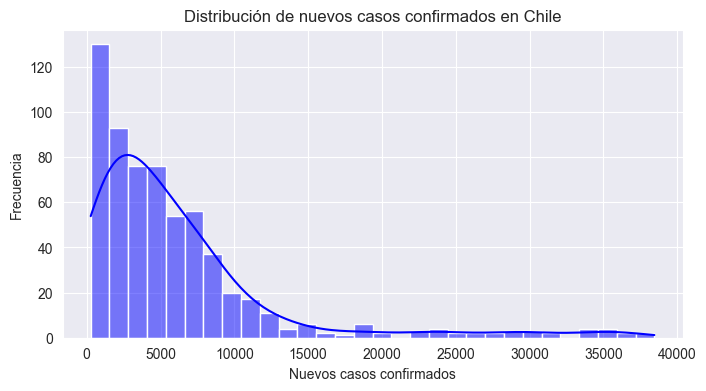

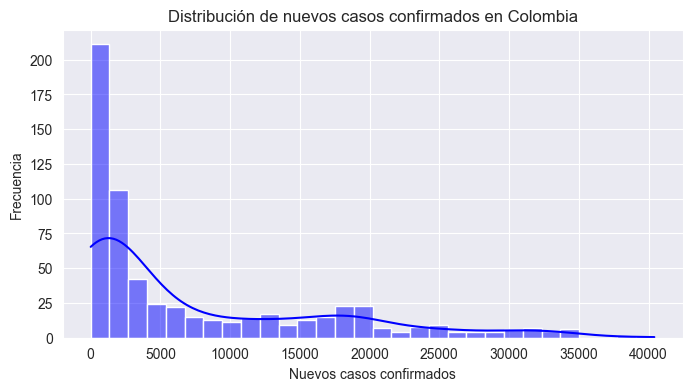

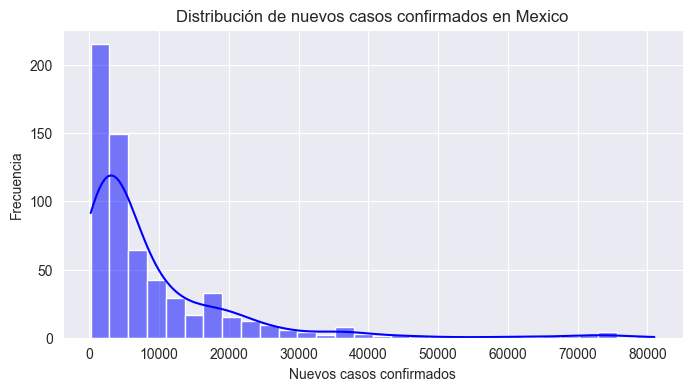

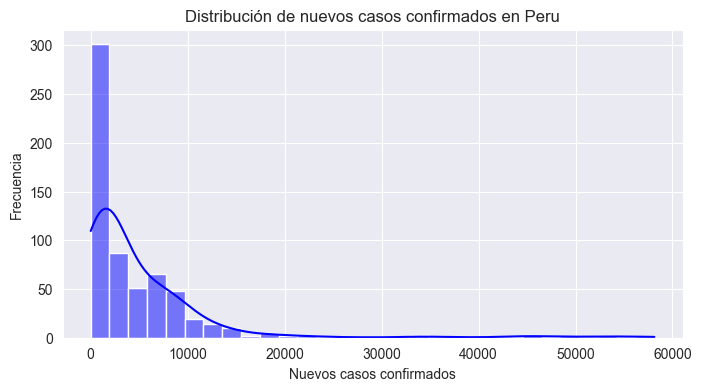

In [ ]:
# Histograma por pais

# Generar gráficos por país
for country in df_completo['country_name'].unique():
    df_country = df_completo[df_completo['country_name'] == country]
    
    # Histogramas
    sns.histplot(df_country['new_confirmed'], bins=30, kde=True, color="blue")
    plt.title(f"Distribución de nuevos casos confirmados en {country}")
    plt.xlabel("Nuevos casos confirmados")
    plt.ylabel("Frecuencia")
    plt.show()

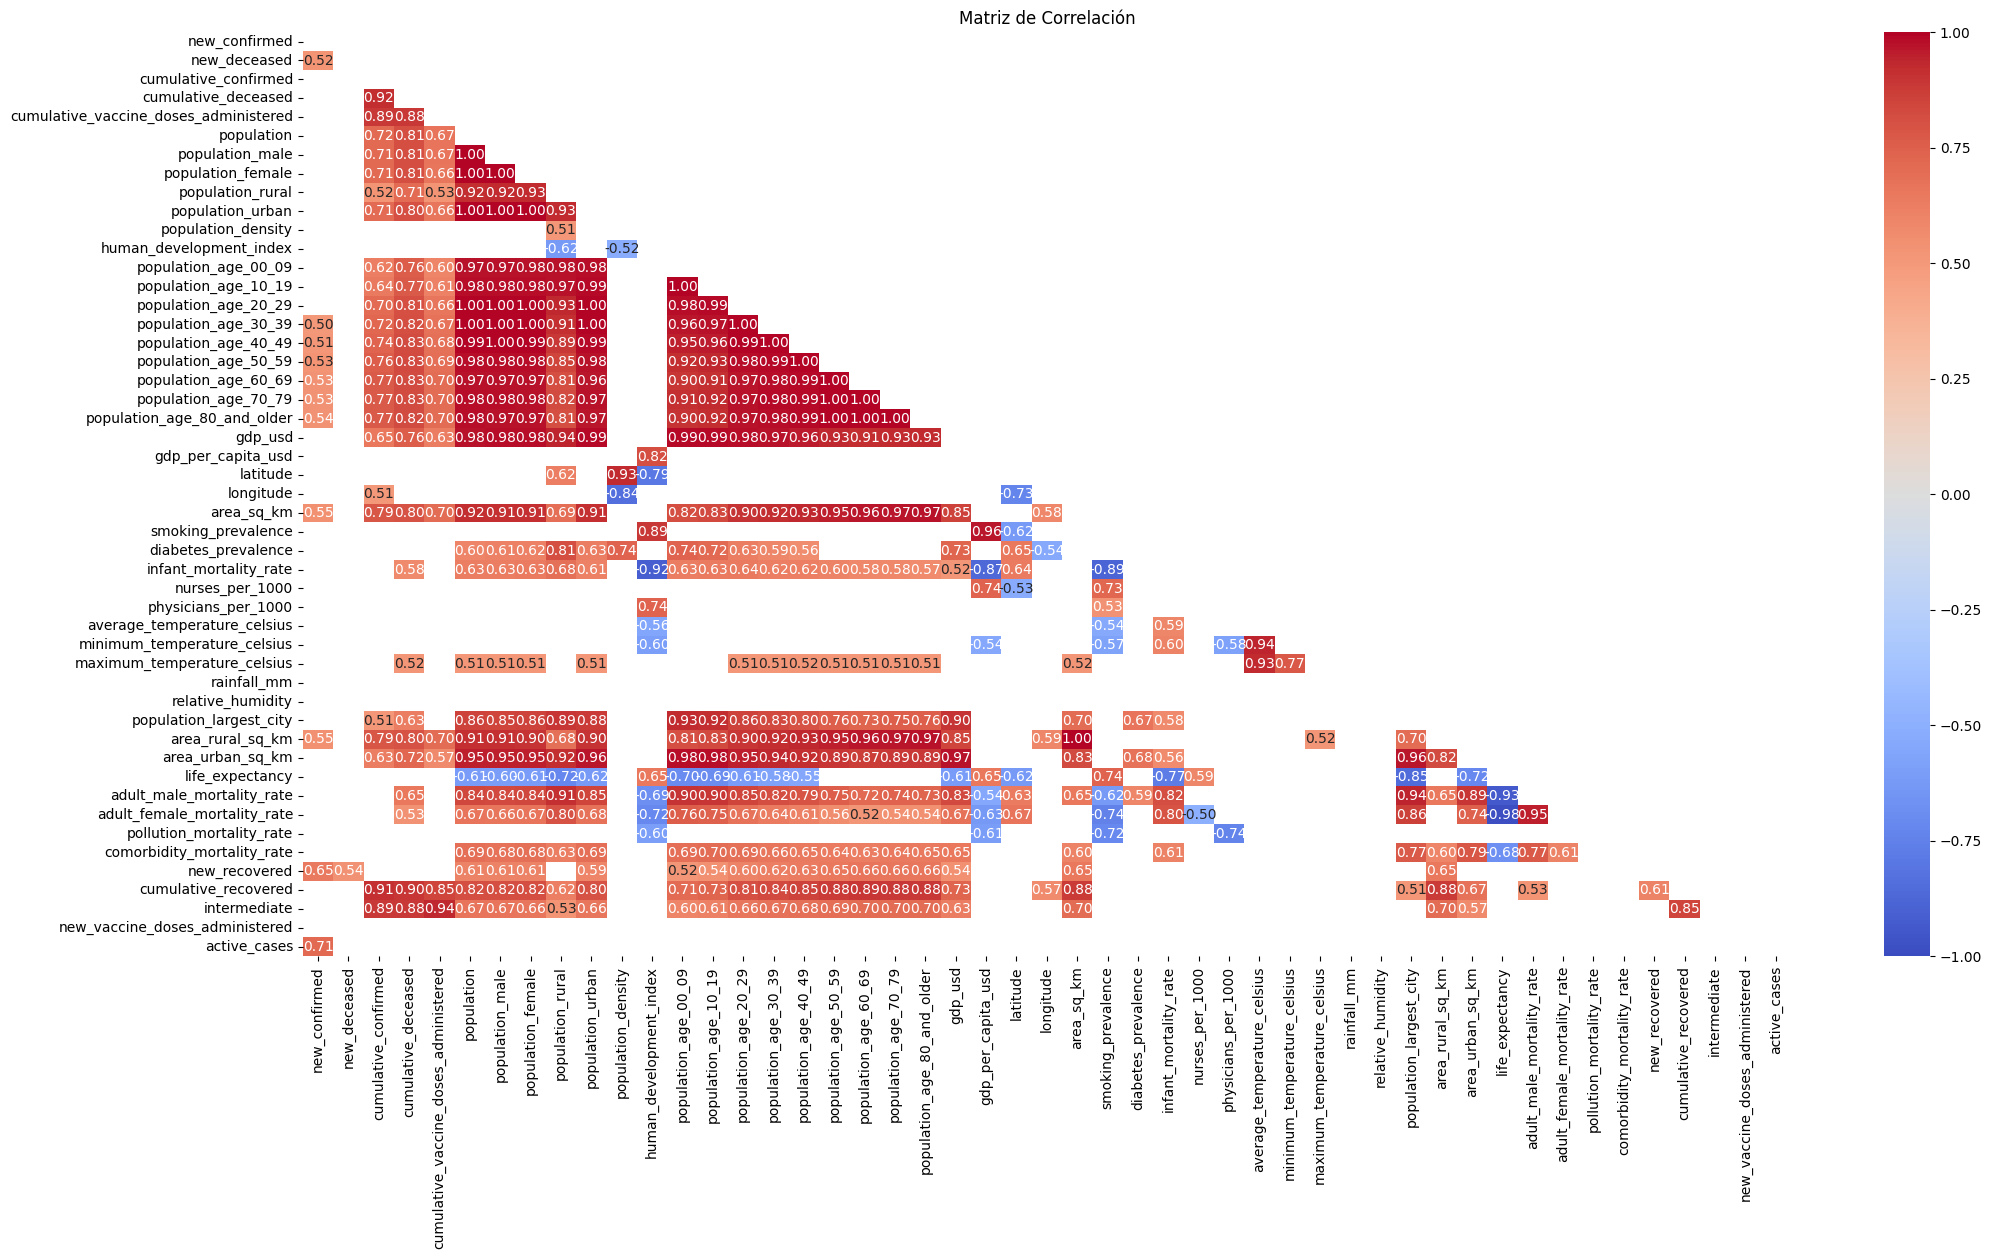

In [34]:
#Columna de interes para relacionar
columnas_numericas=df_completo.select_dtypes(include=["float64","int64"]).columns

# Correlación
correlaciones = df_completo[columnas_numericas].corr()

# Crear la máscara para ocultar la diagonal superior
mask = np.triu(np.ones_like(correlaciones, dtype=bool))

#Valores superiror a 0.5

correlaciones=correlaciones[abs(correlaciones) >abs(0.5)]
correlaciones

# Graficar el heatmap
plt.figure(figsize=(24, 12))  # Ajustar el tamaño del gráfico
sns.heatmap(data=correlaciones, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

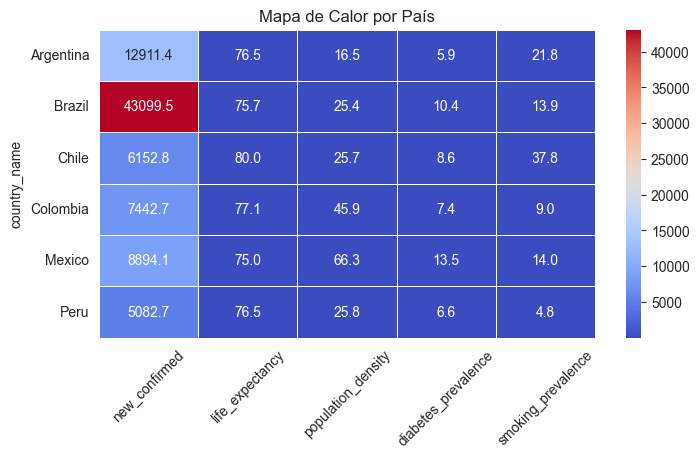

In [ ]:
# Columnas interes
columnas_interes = df_completo[["country_name", "new_confirmed", "life_expectancy", "population_density", "diabetes_prevalence", "smoking_prevalence"]]

# Agrupar por pais
df_grouped = columnas_interes.groupby("country_name").mean().reset_index()

#Mapa de calor
heatmap_data = df_grouped.set_index("country_name") 
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Mapa de Calor por País")
plt.xticks(rotation=45)
plt.show()


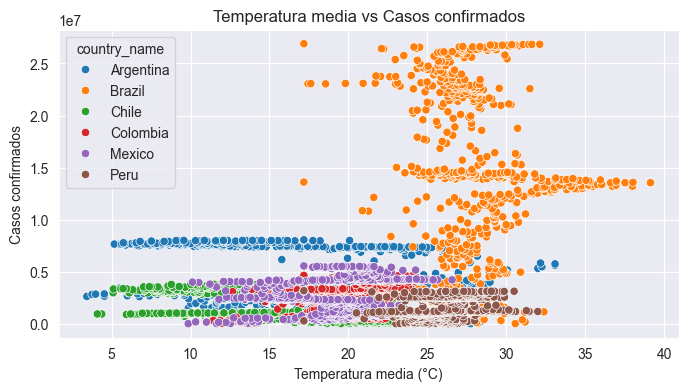

In [ ]:
#Gráficos de dispersión para ver posibles relaciones entre variables:

#Temperatura media vs casos confirmados
sns.scatterplot(data=df_completo, x='average_temperature_celsius', y='cumulative_confirmed', hue='country_name')
plt.title("Temperatura media vs Casos confirmados")
plt.xlabel("Temperatura media (°C)")
plt.ylabel("Casos confirmados")
plt.show()

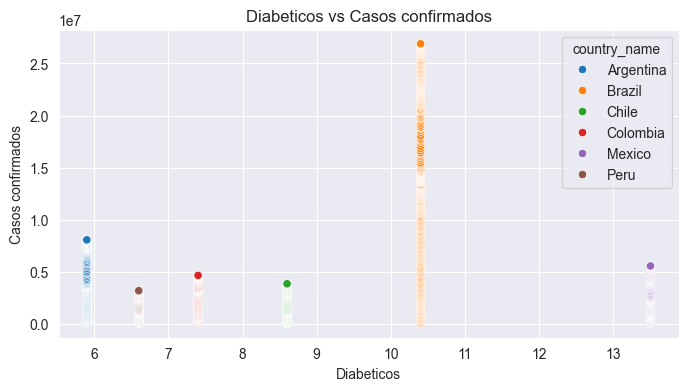

In [ ]:
#Diabetes vs casos confirmados
sns.scatterplot(data=df_completo, x='diabetes_prevalence', y='cumulative_confirmed', hue='country_name')
plt.title("Diabeticos vs Casos confirmados")
plt.xlabel("Diabeticos")
plt.ylabel("Casos confirmados")
plt.show()

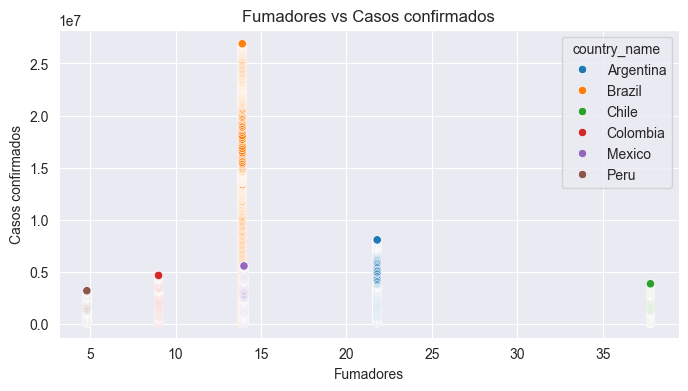

In [ ]:
#Fumadores vs casos confirmados
sns.scatterplot(data=df_completo, x='smoking_prevalence', y='cumulative_confirmed', hue='country_name')
plt.title("Fumadores vs Casos confirmados")
plt.xlabel("Fumadores")
plt.ylabel("Casos confirmados")
plt.show()

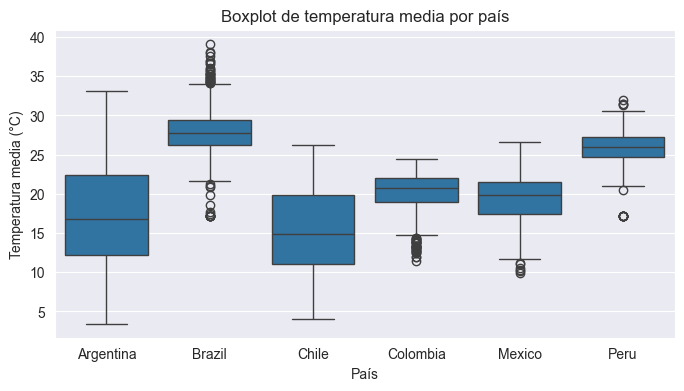

In [ ]:
#Boxplot de temperatura media por país

sns.boxplot(data=df_completo, x='country_name', y='average_temperature_celsius')
plt.title("Boxplot de temperatura media por país")
plt.xlabel("País")
plt.ylabel("Temperatura media (°C)")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24312\1986386081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_completo, x='country_name', y='new_confirmed', palette="muted")


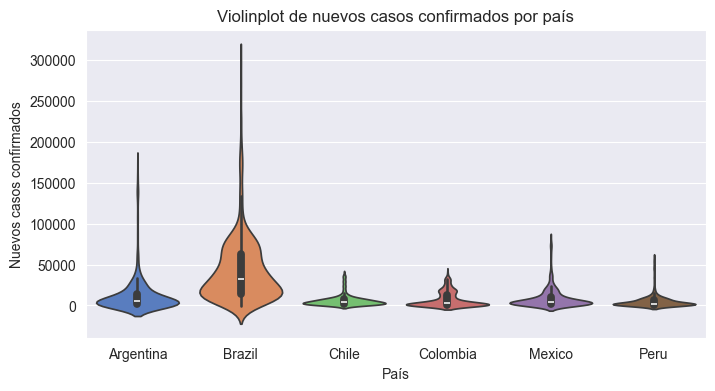

In [ ]:
#Violinplot

sns.violinplot(data=df_completo, x='country_name', y='new_confirmed', palette="muted")
plt.title("Violinplot de nuevos casos confirmados por país")
plt.xlabel("País")
plt.ylabel("Nuevos casos confirmados")
plt.show()

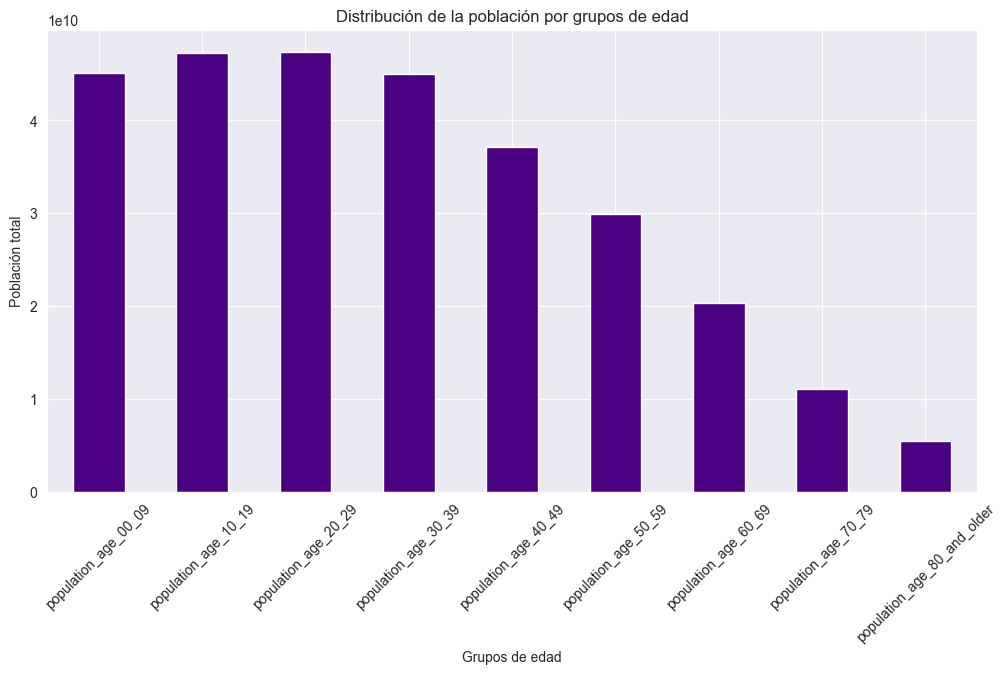

In [ ]:
#Distribución de la población por grupos de edad (GENERAL)

grupos_etarios = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

population_distribution = df_completo[grupos_etarios].sum()
population_distribution.plot(kind='bar', figsize=(12, 6), color='indigo')
plt.title("Distribución de la población por grupos de edad")
plt.xlabel("Grupos de edad")
plt.ylabel("Población total")
plt.xticks(rotation=45)
plt.show()

#### Identificacion de tendencias ####

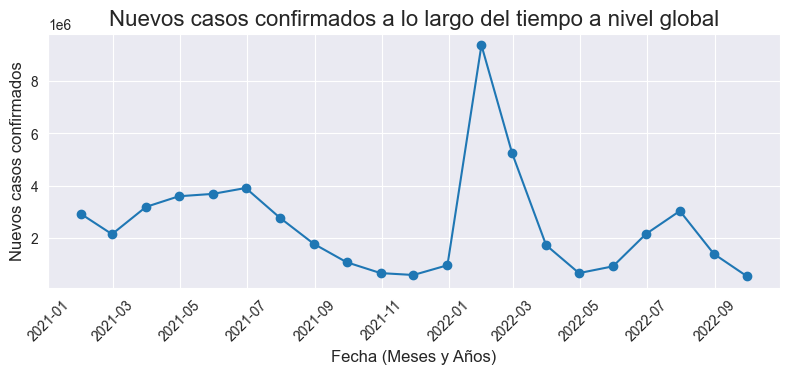

In [ ]:
# Resamplear los datos y calcular la suma de 'new_confirmed' para cada mes
df_resampled = df_completo['new_confirmed'].resample('ME').sum()

# Crear el gráfico de líneas
plt.plot(df_resampled.index, df_resampled, marker='o', linestyle='-')
plt.title('Nuevos casos confirmados a lo largo del tiempo a nivel global', fontsize=16)
plt.xlabel('Fecha (Meses y Años)', fontsize=12)
plt.ylabel('Nuevos casos confirmados', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### Podemos observar que el aumento de casos se da en paralelo con los meses de verano, por lo que podemos evaluar si tiene relacion con la temperatura 

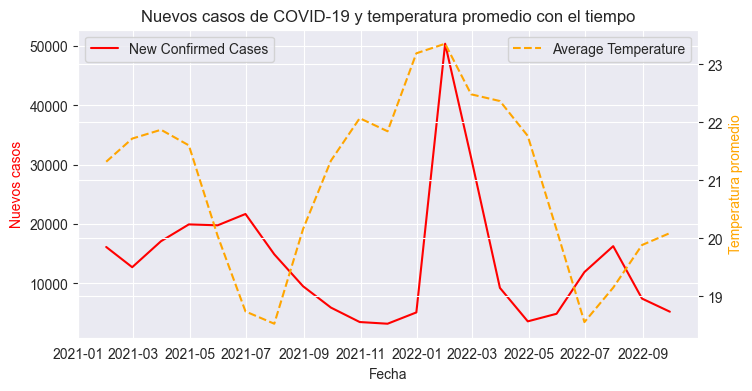

In [ ]:
# Relación entre la temperatura promedio y los nuevos casos confirmados


ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_completo.resample('ME').mean(numeric_only=True).index, df_completo.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(df_completo.resample('ME').mean(numeric_only=True).index, df_completo.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='orange', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos', color='red')
ax2.set_ylabel('Temperatura promedio', color='orange')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

#### Despues de ver la relacion de temperatura con los nuevos casos, podemos confirmar que el calor es una variable que hace que sea propenso el contagio, por lo que se deberian tomar medidas de precaucion mas fuertes en estos meses

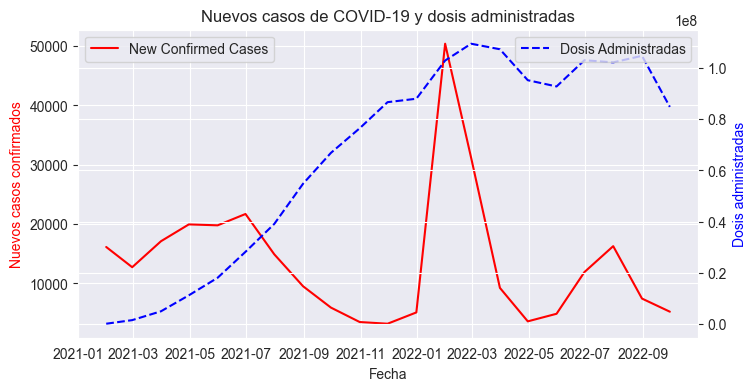

In [ ]:
# Graficamos la suma de dosis administradas y los nuevos casos confirmados

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_completo.resample('ME').mean(numeric_only=True).index, df_completo.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(df_completo.resample('ME').mean(numeric_only=True).index, df_completo.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'], color='blue', label='Dosis Administradas', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Dosis administradas', color='blue')
plt.title('Nuevos casos de COVID-19 y dosis administradas')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

#### Podemos concluir que si se sigue reforzando con administracion de dosis, la tasa de contagio va a teneder a 0 a largo plazo

## AVANCE 3 ##

In [ ]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#Importar archivo

df_completo=pd.read_csv("../Data/DatosFinalesFiltrado.csv", sep=",")

In [ ]:
#Pasar la columna "date" de string a datetime,convertirla en indice y crear una nueva columna que muestre solo mes-año
df_completo['date']=pd.to_datetime(df_completo['date'])
df_completo["mes"] = df_completo["date"].dt.to_period("M")  # Extraer mes para análisis temporal
df_completo.set_index('date', inplace=True)

 #### Realizar un análisis exploratorio utilizando Pandas y Numpy centrándonos en el análisis de series temporales para comprender la evolución de los elementos de conjunto de datos.

In [ ]:
# Resampleo anual, para explorar las variables de incidencia de covid de forma agregada
# Seleccionamos las columnas
columnas_seleccionadas = [
    'new_confirmed', 'new_recovered', 'new_deceased', 'cumulative_confirmed', 'cumulative_recovered', 'cumulative_deceased',
    'cumulative_vaccine_doses_administered', 'gdp_per_capita_usd'
]

# Resamplear por año y calcular la suma para las columnas seleccionadas
df_anual = df_completo[columnas_seleccionadas].resample('YE').sum()

print("Comparativa anual:")
df_anual

Comparativa anual:


,new_confirmed,new_recovered,new_deceased,cumulative_confirmed,cumulative_recovered,cumulative_deceased,cumulative_vaccine_doses_administered,gdp_per_capita_usd
date,,,,,,,,
2021-12-31,2.718433e+07,18346163.0,881316.000000,6.103458e+09,7.063144e+09,2.060220e+08,8.741983e+10,20708324.0
2022-12-31,2.497158e+07,12592801.0,153387.959677,1.147681e+10,7.517481e+09,2.558732e+08,1.576053e+11,14791660.0


##### Observamos el resampleo de los datos por año podemos observar que los nuevos casos confirmados fueron superiores (27 Millones) en 2021, mientras que para 2022 descendieron a la cifra de 24 Millones. Esto puede deberse al desarrollo de inmunidad de la poblacion o a una buena estrategia sanitaria por los gobiernos. #####

In [ ]:
# Resampleo mensual:
# A partir de los insights en el resampleo anual limitaremos los siguientes resampleos a las variables de interes

# Seleccionar de columnas
columnas_seleccionadas_mes = ['new_confirmed','new_recovered', 'new_deceased','cumulative_vaccine_doses_administered', 'cumulative_recovered']

# Resamplear por mes y calcular la suma para las columnas seleccionadas
df_mensual = df_completo[columnas_seleccionadas_mes].resample('ME').sum()

print("Comparativa mensual:")
df_mensual

Comparativa mensual:


,new_confirmed,new_recovered,new_deceased,cumulative_vaccine_doses_administered,cumulative_recovered
date,,,,,
2021-01-31,2.904533e+06,1620795.0,97330.000000,2.989021e+07,2.703413e+08
2021-02-28,2.138410e+06,1639256.0,85189.000000,2.643376e+08,2.995450e+08
2021-03-31,3.182040e+06,1828494.0,112297.000000,9.344490e+08,3.823464e+08
2021-04-30,3.589445e+06,2473565.0,139216.000000,2.026749e+09,4.363482e+08
2021-05-31,3.679939e+06,2258264.0,116165.000000,3.369193e+09,5.251656e+08
2021-06-30,3.905197e+06,2659861.0,104713.000000,5.083040e+09,5.827819e+08
2021-07-31,2.771484e+06,2490959.0,77094.000000,7.278753e+09,6.858512e+08
2021-08-31,1.770509e+06,1288515.0,59589.000000,1.019710e+10,7.410873e+08
2021-09-30,1.066213e+06,751497.0,38149.000000,1.203789e+10,7.468765e+08


#### El resampleo mensual es consistente al anual, puede observarse una mejora en la eficiencia de las medidas de contencion, mostrando una reduccion de los nuevos casos, y ademas reduciendo los decesos proporcionalmente año a año. Sin certeza se puede comentar que de continuar de esta manera, los casos van a tender a minimos.

### Generar Graficos acorde a los Analisis

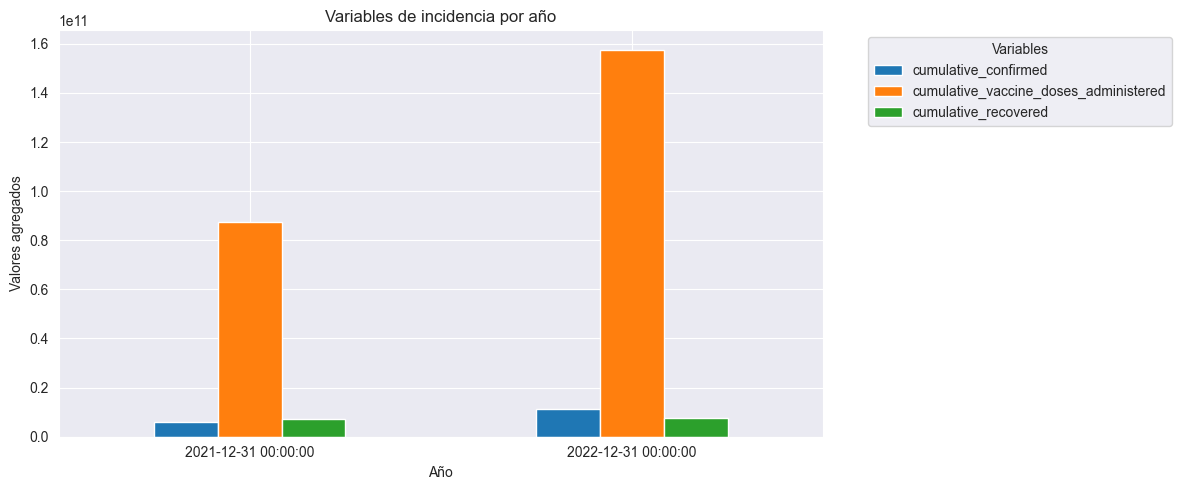

In [ ]:
# Seleccion de columnas
sel_columnas = ['cumulative_confirmed','cumulative_vaccine_doses_administered', 'cumulative_recovered',]

# Resamplear por año y calcular la suma
df_anual = df_completo[sel_columnas].resample('YE').sum()

# Crear el gráfico
df_anual.plot(kind='bar', figsize=(12, 5))

# Configuración del gráfico
plt.title('Variables de incidencia por año')
plt.xlabel('Año')
plt.ylabel('Valores agregados')
plt.xticks(rotation=0)
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Se puede observar que a mayores cantidades de dosis administradas la cantidad de recuperados aumenta

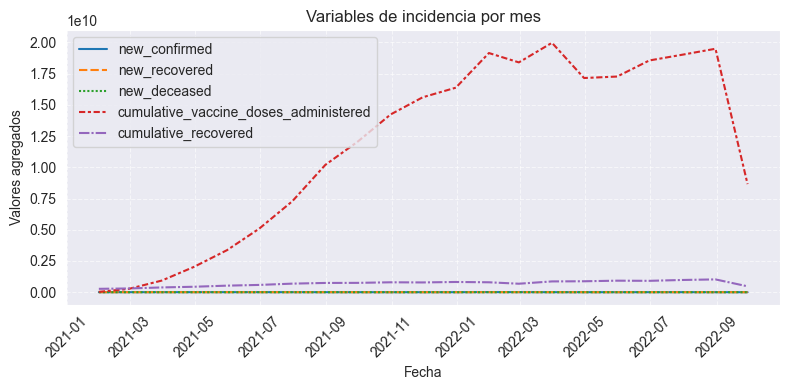

In [ ]:
# Seleccionar las columnas
sel_columnas_mes = ['new_confirmed','new_recovered', 'new_deceased','cumulative_vaccine_doses_administered', 'cumulative_recovered']

# Resamplear por mes y calcular la suma para las columnas seleccionadas
df_mensual = df_completo[sel_columnas_mes].resample('ME').sum()

# Generar el gráfico de líneas
sns.lineplot(data=df_mensual)
plt.title('Variables de incidencia por mes')
plt.xlabel('Fecha')
plt.ylabel('Valores agregados')
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


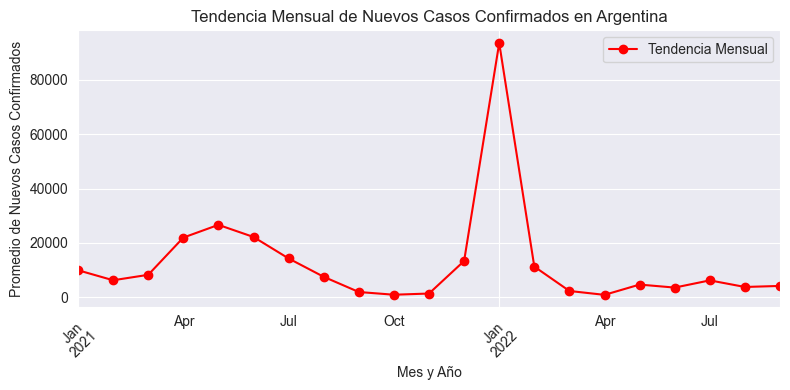

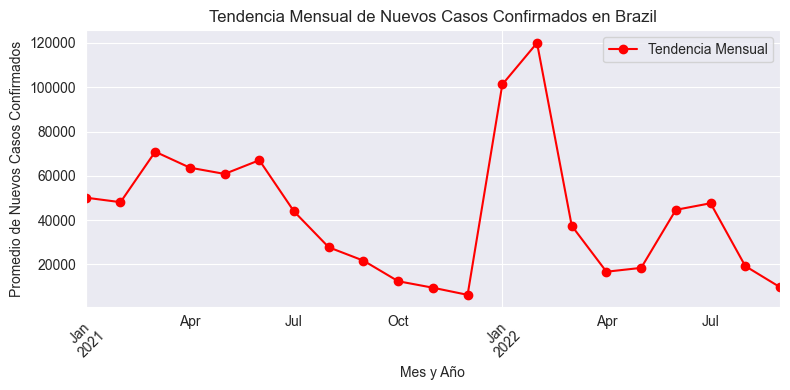

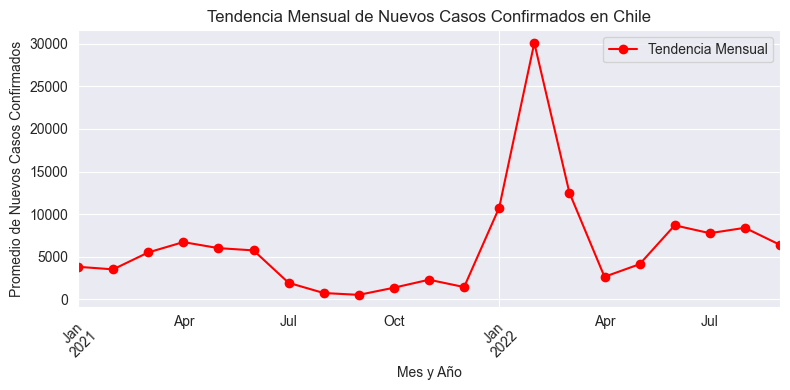

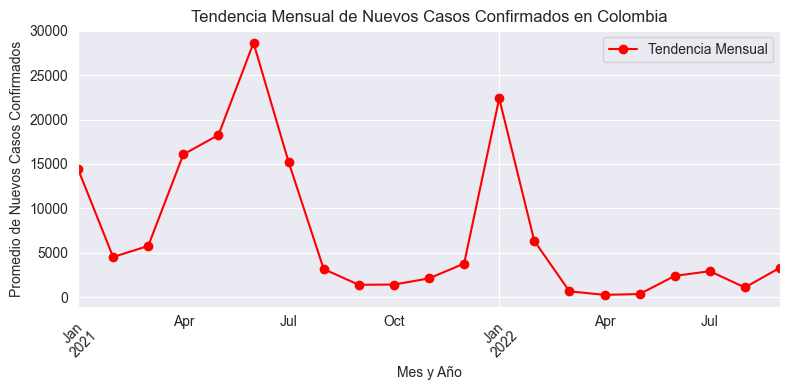

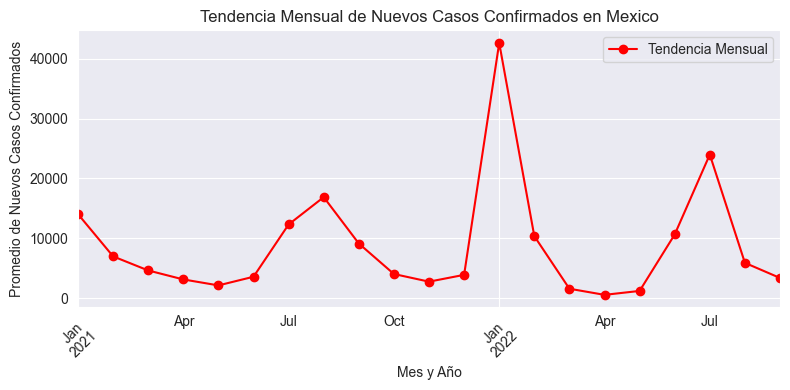

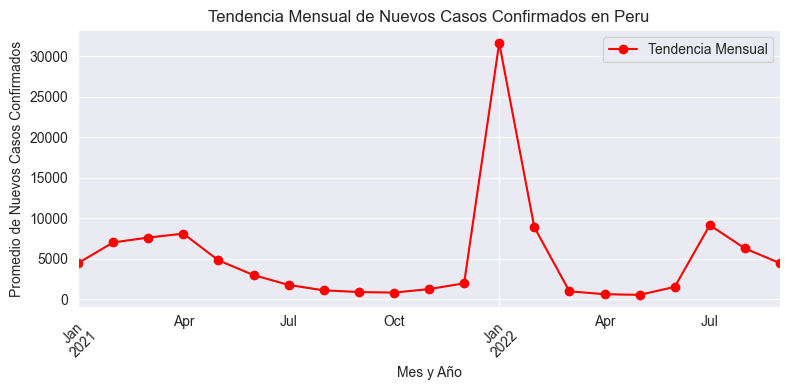

In [ ]:
# USA bucle for para generar graficos de lineas para observar la tendecia mensual de nuevos casos confirmados por pais
for country in df_completo['country_name'].unique():
    # Filtrar datos por país
    df_pais = df_completo[df_completo['country_name'] == country]
    
    # Resamplear por mes y calcular la media de nuevos casos confirmados
    tend_mensual = df_pais['new_confirmed'].resample('ME').mean()

    # Graficar la tendencia mensual
    tend_mensual.plot(label='Tendencia Mensual', color='red', marker='o')
    plt.title(f"Tendencia Mensual de Nuevos Casos Confirmados en {country}")
    plt.xlabel("Mes y Año")
    plt.ylabel("Promedio de Nuevos Casos Confirmados")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Investigar correlaciones

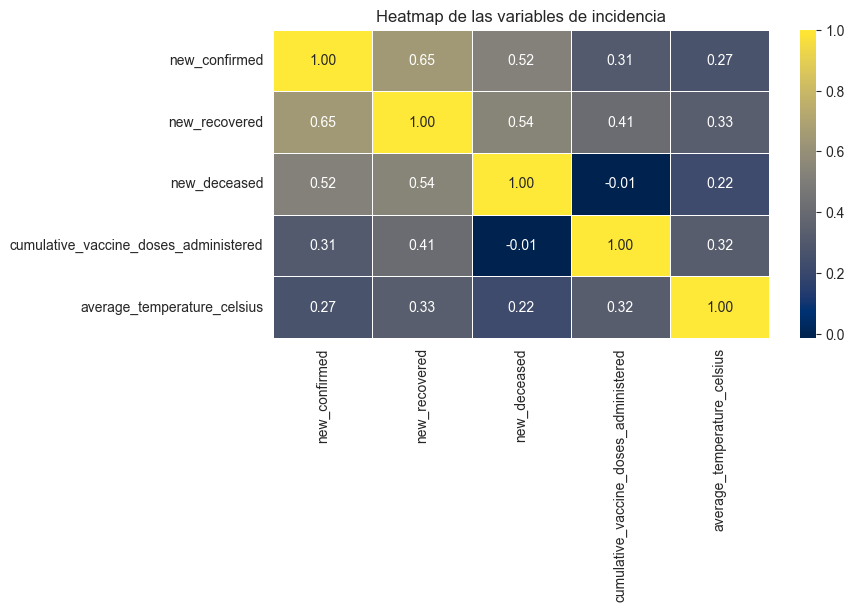

In [ ]:
# Seleccionar las columnas
columnas_heatmap = ['new_confirmed','new_recovered', 'new_deceased', 'cumulative_vaccine_doses_administered',  'average_temperature_celsius']

# Calcular la matriz de correlación
correlation_matrix = df_completo[columnas_heatmap].corr()

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f", linewidths=0.5, linecolor='White')
plt.title('Heatmap de las variables de incidencia')
plt.show()

#### La temperatura incide en la propagacion de COVID, es un factor a tener en cuenta. Por otrolado las cantidad de vacunas adminstradas eleveca la cantidad de nuevos confirmados a nuevos recuperados, lo cual es un factor importante para disminuir la cantidad de muertes.

#### Aplicar las funciones creadas sobre cada columna de acuerdo a tus necesidades.

In [ ]:
# Crear funcion
def calcular_estadisticas(datos):
    """
    Calcula:
        Lala mediana, varianza y rango de un conjunto de datos.

    Parámetros:
        Datos (array-like): Lista o columna de pandas con los datos numéricos.

    Retorna:
        Dict: Diccionario con la mediana, varianza y rango.
    """
    # Asegurarse de que los datos no contengan valores nulos
    limpieza_datos = [dato for dato in datos if not np.isnan(dato)]

    # Calcular las métricas
    mediana = np.median(limpieza_datos)
    varianza = np.var(limpieza_datos, ddof=1)  # ddof=1 para varianza muestral
    rango = np.max(limpieza_datos) - np.min(limpieza_datos)

    return {
        'mediana': mediana,
        'varianza': varianza,
        'rango': rango
    }

In [ ]:
#Aplicacion de la funcion:

# Lista de columnas
columnas_numericas = ['new_confirmed', 'new_deceased', 'cumulative_confirmed']

# Calculo de estadística
for columna in columnas_numericas:
    estadisticas = calcular_estadisticas(df_completo[columna])
    print(f"Estadísticas para '{columna}': {estadisticas}")

Estadísticas para 'new_confirmed': {'mediana': np.float64(5227.0), 'varianza': np.float64(585908652.8478458), 'rango': np.float64(298981.0)}
Estadísticas para 'new_deceased': {'mediana': np.float64(101.0), 'varianza': np.float64(257184.0754690855), 'rango': np.float64(11447.0)}
Estadísticas para 'cumulative_confirmed': {'mediana': np.float64(2880439.0), 'varianza': np.float64(34263084512132.562), 'rango': np.float64(26892382.770967744)}


## AVANCE 3 ##